In [2]:
!pip install pytesseract

In [4]:
!pip install colorama

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
#Tesseract Library
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
from google.colab import files
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

### Make prettier the prints ###
from colorama import Fore, Style
c_ = Fore.CYAN
m_ = Fore.MAGENTA
r_ = Fore.RED
b_ = Fore.BLUE
y_ = Fore.YELLOW
g_ = Fore.GREEN
w_ = Fore.WHITE

import warnings
warnings.filterwarnings(action='ignore')

In [27]:
def ExtractDetails(image_path):
    text = pytesseract.image_to_string(Image.open(image_path), lang = 'eng')
    text = text.replace("\n", " ")
    text = text.replace("  ", " ")
    regex_DOB = re.compile('\d{2}[-/]\d{2}[-/]\d{4}')
    regex_num = re.compile('[A-Z]{5}[0-9]{4}[A-Z]{1}')

    image = cv2.imread(os.path.join(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")

    if len(regex_num.findall(text)) == 0:
        print(f'{y_}Blurry Image for tesseract. Input new clear image for viewing pan card number !!!')
        print(Style.RESET_ALL)
    else:
        print("Pan Card Number : ", regex_num.findall(text)[0])

    print('=================================')

    if len(regex_DOB.findall(text)) == 0:
        print(f'{y_}Blurry Image for tesseract. Input new clear image for viewing DATE OF BIRTH !!!')
        print(Style.RESET_ALL)
    else:
        print("DATE OF BIRTH :   ", regex_DOB.findall(text)[0])

    print('=================================')

In [10]:
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Ign:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,200 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,600 k

In [11]:
!which tesseract

/usr/bin/tesseract


Saving pan2.png to pan2 (5).png
Pan Card Number :  BXAPC1000L
DATE OF BIRTH :    13/09/1996


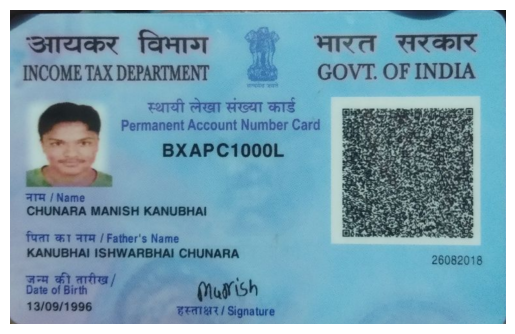

In [28]:
# Upload image file
uploaded_file = files.upload()

# Get the uploaded file name
image_path = next(iter(uploaded_file))

# Call the function to extract details
ExtractDetails(image_path)